# Machine Learning Experiment 1: Linear and Logistic Regression on Bank Marketing Dataset

**Experiment Title:** Predicting Term Deposit Subscriptions Using Linear and Logistic Regression  
**Date:** February 2026  
**Objective:** To implement and compare Linear and Logistic Regression models on the Bank Marketing dataset to predict customer subscription to term deposits.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

## 1. Dataset Source

**Dataset Name:** Bank Marketing Dataset  
**Source:** https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset  
**Original Paper:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014  
**License:** CC0: Public Domain  
**File Size:** 918.96 kB

## 2. Dataset Description

The Bank Marketing dataset contains information about a marketing campaign of a Portuguese banking institution. The dataset aims to predict whether a client will subscribe to a term deposit based on their personal characteristics and interaction history with the bank.

### Dataset Overview:
- **Number of Records:** Approximately 45,211 samples
- **Number of Features:** 17 input features + 1 target variable
- **Target Variable:** `y` - whether the client subscribed to a term deposit (binary: 'yes' or 'no')
- **Data Types:** Mix of numerical and categorical features

### Features Description:
1. **age** (numerical): Age of the client
2. **job** (categorical): Type of job (admin., technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student)
3. **marital** (categorical): Marital status (married, single, divorced, unknown)
4. **education** (categorical): Education level (primary, secondary, tertiary, unknown)
5. **default** (categorical): Has credit in default? (yes, no, unknown)
6. **balance** (numerical): Annual balance in euros
7. **housing** (categorical): Has housing loan? (yes, no, unknown)
8. **loan** (categorical): Has personal loan? (yes, no, unknown)
9. **contact** (categorical): Contact communication type (cellular, telephone, unknown)
10. **day** (numerical): Last contact day of the month
11. **month** (categorical): Last contact month of year
12. **duration** (numerical): Last contact duration in seconds
13. **campaign** (numerical): Number of contacts performed during this campaign for this client
14. **pdays** (numerical): Number of days passed since previous campaign contact (-1 means client was not previously contacted)
15. **previous** (numerical): Number of contacts performed before this campaign
16. **poutcome** (categorical): Outcome of previous marketing campaign (unknown, other, failure, success)

In [32]:
# Load the bank marketing dataset
# Note: Download from Kaggle and place in the same directory as this notebook
# df = pd.read_csv('bank.csv', sep=';')

# For demonstration purposes, we'll create a sample load structure
# Replace the path with your actual dataset location
try:
    df = pd.read_csv('bank.csv', sep=',')  # Changed from sep=';' to sep=','
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file 'bank.csv' not found.")
    print("Please download from: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset")
    print("and place it in the same directory as this notebook.")
    df = None

Dataset loaded successfully!


In [33]:
if df is not None:
    print("Dataset Shape:", df.shape)
    print("\n" + "="*80)
    print("First Few Rows:")
    print(df.head())
    print("\n" + "="*80)
    print("Data Types:")
    print(df.dtypes)
    print("\n" + "="*80)
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n" + "="*80)
    print("Statistical Summary:")
    print(df.describe())

Dataset Shape: (11162, 17)

First Few Rows:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Data Types:
age          int64
job            str
mari

Target Variable Distribution:
deposit
no     5873
yes    5289
Name: count, dtype: int64

Target Variable Proportion:
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


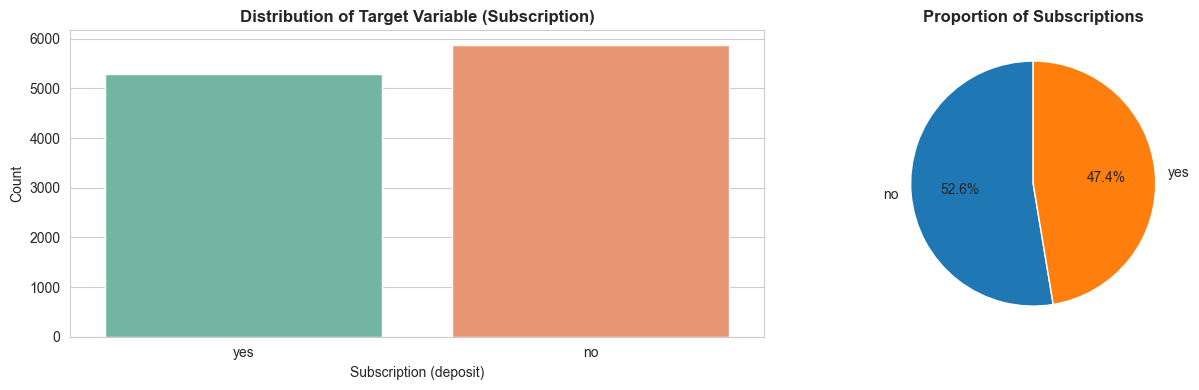

In [34]:
if df is not None:
    # Target variable distribution
    print("Target Variable Distribution:")
    print(df['deposit'].value_counts())  # Changed from 'y' to 'deposit'
    print("\nTarget Variable Proportion:")
    print(df['deposit'].value_counts(normalize=True))  # Changed from 'y' to 'deposit'
    
    # Visualize target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Count plot
    sns.countplot(x='deposit', data=df, ax=axes[0], palette='Set2')  # Changed from 'y' to 'deposit'
    axes[0].set_title('Distribution of Target Variable (Subscription)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Subscription (deposit)')
    axes[0].set_ylabel('Count')
    
    # Pie chart
    df['deposit'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)  # Changed from 'y' to 'deposit'
    axes[1].set_title('Proportion of Subscriptions', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Dataset not loaded. Please download 'bank.csv' from:")
    print("https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset")
    print("Place it in the same directory as this notebook to run the analysis.")

## 3. Mathematical Formulation of Algorithms

### 3.1 Linear Regression

Linear Regression models the relationship between independent variables (features) and a continuous dependent variable (target) using a linear equation:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

Where:
- $y$ is the predicted value
- $\beta_0$ is the intercept
- $\beta_i$ are the regression coefficients
- $x_i$ are the input features
- $n$ is the number of features

**Cost Function (Ordinary Least Squares - OLS):**

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)})^2$$

Where:
- $m$ is the number of training samples
- $h_\beta(x^{(i)})$ is the predicted value
- $y^{(i)}$ is the actual value

### 3.2 Logistic Regression

Logistic Regression is used for binary classification. It models the probability of a binary outcome using the sigmoid (logistic) function:

$$p(y=1|x) = \sigma(z) = \frac{1}{1+e^{-z}}$$

Where:
$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

**Cost Function (Log Loss / Cross-Entropy):**

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\beta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\beta(x^{(i)}))]$$

**Decision Rule:**
- If $p(y=1|x) \geq 0.5$, predict class 1
- Otherwise, predict class 0

The decision boundary is determined by the chosen probability threshold (typically 0.5).

## 4. Algorithm Limitations

### 4.1 Linear Regression Limitations

1. **Linearity Assumption:** Linear Regression assumes a linear relationship between features and target. If the relationship is non-linear, the model will perform poorly.

2. **Sensitivity to Outliers:** Extreme values can significantly affect the model's coefficients and predictions, leading to biased estimates.

3. **Feature Scaling Dependency:** The magnitude of coefficients is affected by the scale of features. Features must be scaled appropriately for fair comparison.

4. **Multicollinearity Issues:** When features are highly correlated, it becomes difficult to determine individual feature effects and results in unstable estimates.

5. **Independence Assumption:** Linear Regression assumes that observations are independent. Violated in time-series or hierarchical data.

6. **Assumes Normally Distributed Errors:** The model assumes that residuals follow a normal distribution, which may not hold for all datasets.

### 4.2 Logistic Regression Limitations

1. **Binary Classification Limitation:** Standard Logistic Regression is designed for binary classification. Multiclass problems require specialized extensions (One-vs-Rest, Multinomial Logistic Regression).

2. **Linear Decision Boundary:** Logistic Regression creates linear decision boundaries. Complex non-linear boundaries cannot be captured without feature engineering.

3. **Requires Feature Scaling:** Like Linear Regression, Logistic Regression benefits from scaled features, especially when using regularization.

4. **Imbalanced Dataset Issues:** With highly imbalanced datasets (e.g., 95% class 0, 5% class 1), the model tends to be biased toward the majority class.

5. **Interpretability Challenges:** While coefficients represent feature importance, the interpretation is complex and can be misleading with correlated features.

6. **Assumes Linearity in Log-Odds:** The model assumes a linear relationship between features and the log-odds of the target, which may not always be true.

## 5. Methodology / Workflow

### Experiment Workflow

```
┌─────────────────────────────┐
│   1. Load Dataset           │
│   (Bank Marketing Data)     │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 2. Exploratory Data         │
│    Analysis (EDA)           │
│  - Data profiling           │
│  - Distribution analysis    │
│  - Missing value check      │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 3. Data Preprocessing       │
│  - Handle missing values    │
│  - Encode categorical vars  │
│  - Feature scaling          │
│  - Remove/handle outliers   │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 4. Train-Test Split        │
│  - 70% training            │
│  - 30% testing             │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 5. Model Training           │
│  - Linear Regression        │
│  - Logistic Regression      │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 6. Model Evaluation         │
│  - Performance metrics      │
│  - Visualizations           │
│  - Error analysis           │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 7. Hyperparameter Tuning    │
│  - GridSearchCV             │
│  - Cross-validation         │
│  - Parameter optimization   │
└──────────────┬──────────────┘
               │
               ▼
┌─────────────────────────────┐
│ 8. Final Performance        │
│    Analysis & Comparison    │
└─────────────────────────────┘
```

### Step-by-Step Process:

1. **Data Loading:** Import the dataset and examine its structure
2. **EDA:** Analyze data characteristics, distributions, and relationships
3. **Preprocessing:** Clean data, encode categorical variables, scale features
4. **Train-Test Split:** Divide data into training (70%) and testing (30%) sets
5. **Model Training:** Fit Linear and Logistic Regression models
6. **Evaluation:** Assess model performance using appropriate metrics
7. **Hyperparameter Tuning:** Optimize model parameters using GridSearchCV
8. **Comparison:** Compare results and generate conclusions

## 6. Data Preprocessing

### 6.1 Data Cleaning and Preparation

In [35]:
if df is not None:
    # Create a copy of the dataframe for preprocessing
    df_processed = df.copy()
    
    # Convert target variable to binary (1 for 'yes', 0 for 'no')
    df_processed['deposit'] = (df_processed['deposit'] == 'yes').astype(int)  # Changed from 'y' to 'deposit'
    
    # Identify categorical and numerical columns
    categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Remove target variable from feature columns
    if 'deposit' in numerical_cols:  # Changed from 'y' to 'deposit'
        numerical_cols.remove('deposit')
    
    print("Categorical Columns:", categorical_cols)
    print("Numerical Columns:", numerical_cols)
    print("\nTotal Features:", len(categorical_cols) + len(numerical_cols))

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Total Features: 16


In [36]:
if df is not None:
    # Encode categorical variables using Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
    
    print("Categorical variables encoded successfully!")
    print("\nDataset after encoding:")
    print(df_processed.head())
    print("\nData types after preprocessing:")
    print(df_processed.dtypes)

Categorical variables encoded successfully!

Dataset after encoding:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1  

Data types after preprocessing:
age

In [37]:
if df is not None:
    # Separate features and target
    X = df_processed.drop('deposit', axis=1)  # Changed from 'y' to 'deposit'
    y = df_processed['deposit']  # Changed from 'y' to 'deposit'
    
    # Split data into training and testing sets (70-30 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
    
    print("Data Split Summary:")
    print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
    print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
    print(f"Number of features: {X_train.shape[1]}")
    print(f"\nTraining set target distribution:")
    print(y_train.value_counts())
    print(f"\nTesting set target distribution:")
    print(y_test.value_counts())

Data Split Summary:
Training set size: 7813 samples (70.0%)
Testing set size: 3349 samples (30.0%)
Number of features: 16

Training set target distribution:
deposit
0    4111
1    3702
Name: count, dtype: int64

Testing set target distribution:
deposit
0    1762
1    1587
Name: count, dtype: int64


In [38]:
if df is not None:
    # Feature Scaling using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to dataframe for easier handling
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    print("Feature Scaling Completed!")
    print("\nScaled Training Set - First 5 rows:")
    print(X_train_scaled.head())
    print("\nScaled Training Set - Statistics:")
    print(X_train_scaled.describe())

Feature Scaling Completed!

Scaled Training Set - First 5 rows:
        age       job   marital  education   default   balance   housing  \
0  1.507850  1.398332 -0.319994  -0.383768 -0.123833 -0.498913 -0.947979   
1 -0.851198  1.398332  1.280591   0.947070 -0.123833 -0.346542 -0.947979   
2 -0.598443 -1.392974  1.280591   0.947070 -0.123833  0.928809  1.054876   
3 -0.682694  1.398332 -0.319994  -0.383768 -0.123833 -0.397220  1.054876   
4 -0.261436 -1.082828  1.280591  -0.383768 -0.123833 -0.498913 -0.947979   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.383775 -0.599968  1.571827 -1.395181 -0.894720 -0.176950 -0.481859   
1 -0.383775 -0.599968  1.690409 -1.708983 -0.304035 -0.533542 -0.481859   
2 -0.383775 -0.599968  0.623173  1.115237  0.993154 -0.533542 -0.481859   
3 -0.383775 -0.599968 -1.511299 -0.767576 -0.046335 -0.533542  2.303242   
4 -0.383775 -0.599968  1.334664  1.429039 -0.214275 -0.533542  0.219027   

   previous  poutcome  
0 -0

## 7. Model Training - Logistic Regression (Primary Model)

Logistic Regression is the primary model for this classification task as it predicts a binary outcome (subscription: yes/no).

In [39]:
if df is not None:
    # Train Logistic Regression model
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    
    print("Logistic Regression Model Training Complete!")
    print(f"\nModel Parameters:")
    print(f"Intercept: {log_reg.intercept_[0]:.6f}")
    print(f"Number of features: {len(log_reg.coef_[0])}")
    
    # Make predictions
    y_train_pred = log_reg.predict(X_train_scaled)
    y_test_pred = log_reg.predict(X_test_scaled)
    
    # Get probability predictions
    y_train_pred_proba = log_reg.predict_proba(X_train_scaled)
    y_test_pred_proba = log_reg.predict_proba(X_test_scaled)
    
    print("\nPrediction Summary:")
    print(f"Training predictions shape: {y_train_pred.shape}")
    print(f"Testing predictions shape: {y_test_pred.shape}")
    print(f"Training predictions (first 10): {y_train_pred[:10]}")
    print(f"Testing predictions (first 10): {y_test_pred[:10]}")
    
    # Feature coefficients
    coef_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': log_reg.coef_[0]
    }).sort_values('Coefficient', ascending=False)
    
    print("\nTop 10 Features by Coefficient (Importance):")
    print(coef_df.head(10))

Logistic Regression Model Training Complete!

Model Parameters:
Intercept: -0.059371
Number of features: 16

Prediction Summary:
Training predictions shape: (7813,)
Testing predictions shape: (3349,)
Training predictions (first 10): [0 1 1 1 1 0 0 1 1 0]
Testing predictions (first 10): [1 1 1 1 0 1 0 1 1 1]

Top 10 Features by Coefficient (Importance):
      Feature  Coefficient
11   duration     1.706918
13      pdays     0.334843
14   previous     0.253330
15   poutcome     0.169074
3   education     0.167285
5     balance     0.135258
2     marital     0.119575
0         age     0.072313
10      month     0.068857
1         job     0.049178


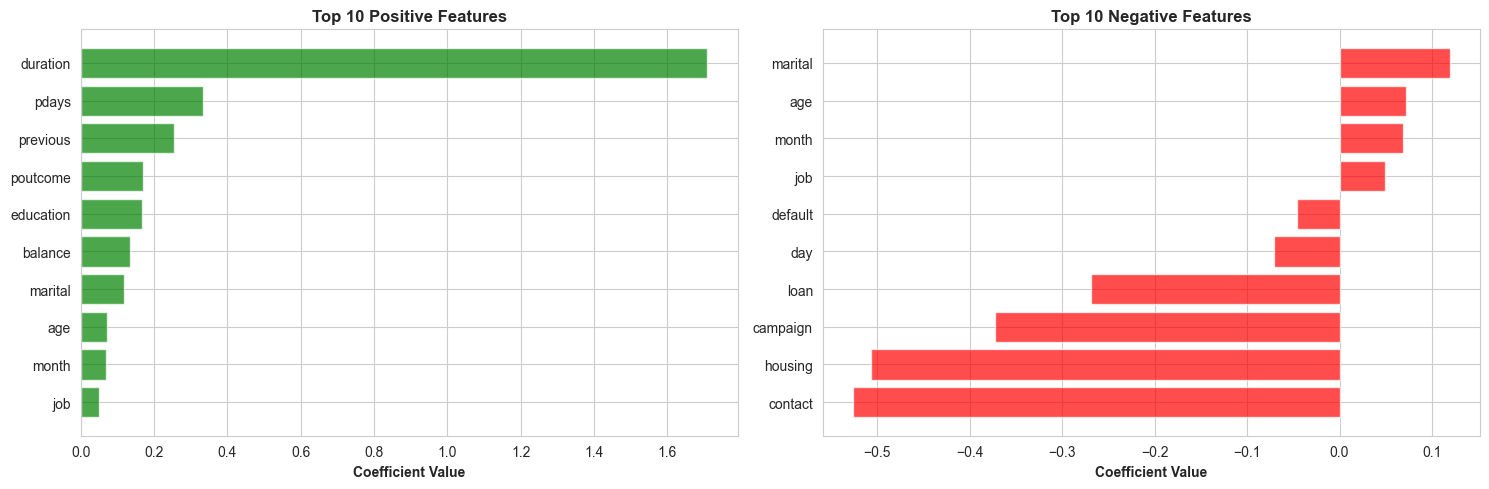

In [40]:
if df is not None:
    # Visualize top features
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Top positive coefficients
    top_positive = coef_df.head(10)
    axes[0].barh(range(len(top_positive)), top_positive['Coefficient'].values, color='green', alpha=0.7)
    axes[0].set_yticks(range(len(top_positive)))
    axes[0].set_yticklabels(top_positive['Feature'].values)
    axes[0].set_xlabel('Coefficient Value', fontweight='bold')
    axes[0].set_title('Top 10 Positive Features', fontweight='bold')
    axes[0].invert_yaxis()
    
    # Top negative coefficients
    bottom_negative = coef_df.tail(10)
    axes[1].barh(range(len(bottom_negative)), bottom_negative['Coefficient'].values, color='red', alpha=0.7)
    axes[1].set_yticks(range(len(bottom_negative)))
    axes[1].set_yticklabels(bottom_negative['Feature'].values)
    axes[1].set_xlabel('Coefficient Value', fontweight='bold')
    axes[1].set_title('Top 10 Negative Features', fontweight='bold')
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

## 8. Model Training - Linear Regression (Secondary Analysis)

For comparison purposes, we also train a Linear Regression model. Note that Linear Regression predicts continuous values, but we can still use it for analysis.

In [41]:
if df is not None:
    # Train Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled, y_train)
    
    print("Linear Regression Model Training Complete!")
    print(f"\nModel Parameters:")
    print(f"Intercept: {lin_reg.intercept_:.6f}")
    print(f"Number of features: {len(lin_reg.coef_)}")
    
    # Make predictions
    y_train_pred_lr = lin_reg.predict(X_train_scaled)
    y_test_pred_lr = lin_reg.predict(X_test_scaled)
    
    print("\nPrediction Summary:")
    print(f"Training predictions shape: {y_train_pred_lr.shape}")
    print(f"Testing predictions shape: {y_test_pred_lr.shape}")
    print(f"Training predictions (first 10): {y_train_pred_lr[:10]}")
    print(f"Testing predictions (first 10): {y_test_pred_lr[:10]}")
    
    # Feature coefficients
    coef_df_lr = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lin_reg.coef_
    }).sort_values('Coefficient', ascending=False)
    
    print("\nTop 10 Features by Coefficient:")
    print(coef_df_lr.head(10))

Linear Regression Model Training Complete!

Model Parameters:
Intercept: 0.473826
Number of features: 16

Prediction Summary:
Training predictions shape: (7813,)
Testing predictions shape: (3349,)
Training predictions (first 10): [0.35320681 0.53608938 0.7295319  0.63720458 0.56904672 0.07019181
 0.47529827 0.57935117 0.63084759 0.35760154]
Testing predictions (first 10): [0.52543554 0.52378373 0.68893997 0.58913444 0.47887073 0.77772862
 0.25009191 0.76872442 0.85394631 0.88849382]

Top 10 Features by Coefficient:
      Feature  Coefficient
11   duration     0.224105
13      pdays     0.061085
14   previous     0.037132
15   poutcome     0.028490
3   education     0.026052
5     balance     0.021760
2     marital     0.019803
10      month     0.016113
0         age     0.010784
1         job     0.006447


## 9. Performance Analysis

### 9.1 Logistic Regression Performance

In [42]:
if df is not None:
    # Logistic Regression Performance Metrics
    print("="*80)
    print("LOGISTIC REGRESSION PERFORMANCE METRICS")
    print("="*80)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
    train_auc = roc_auc_score(y_train, y_train_pred_proba[:, 1])
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    test_auc = roc_auc_score(y_test, y_test_pred_proba[:, 1])
    
    print("\n--- Training Set Performance ---")
    print(f"Accuracy:  {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall:    {train_recall:.4f}")
    print(f"F1-Score:  {train_f1:.4f}")
    print(f"AUC-ROC:   {train_auc:.4f}")
    
    print("\n--- Testing Set Performance ---")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1-Score:  {test_f1:.4f}")
    print(f"AUC-ROC:   {test_auc:.4f}")
    
    # Confusion Matrix
    print("\n--- Confusion Matrix (Test Set) ---")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    print(f"True Negatives:  {cm[0, 0]}")
    print(f"False Positives: {cm[0, 1]}")
    print(f"False Negatives: {cm[1, 0]}")
    print(f"True Positives:  {cm[1, 1]}")

LOGISTIC REGRESSION PERFORMANCE METRICS

--- Training Set Performance ---
Accuracy:  0.7953
Precision: 0.7941
Recall:    0.7669
F1-Score:  0.7803
AUC-ROC:   0.8672

--- Testing Set Performance ---
Accuracy:  0.8011
Precision: 0.8032
Recall:    0.7687
F1-Score:  0.7856
AUC-ROC:   0.8743

--- Confusion Matrix (Test Set) ---
[[1463  299]
 [ 367 1220]]
True Negatives:  1463
False Positives: 299
False Negatives: 367
True Positives:  1220


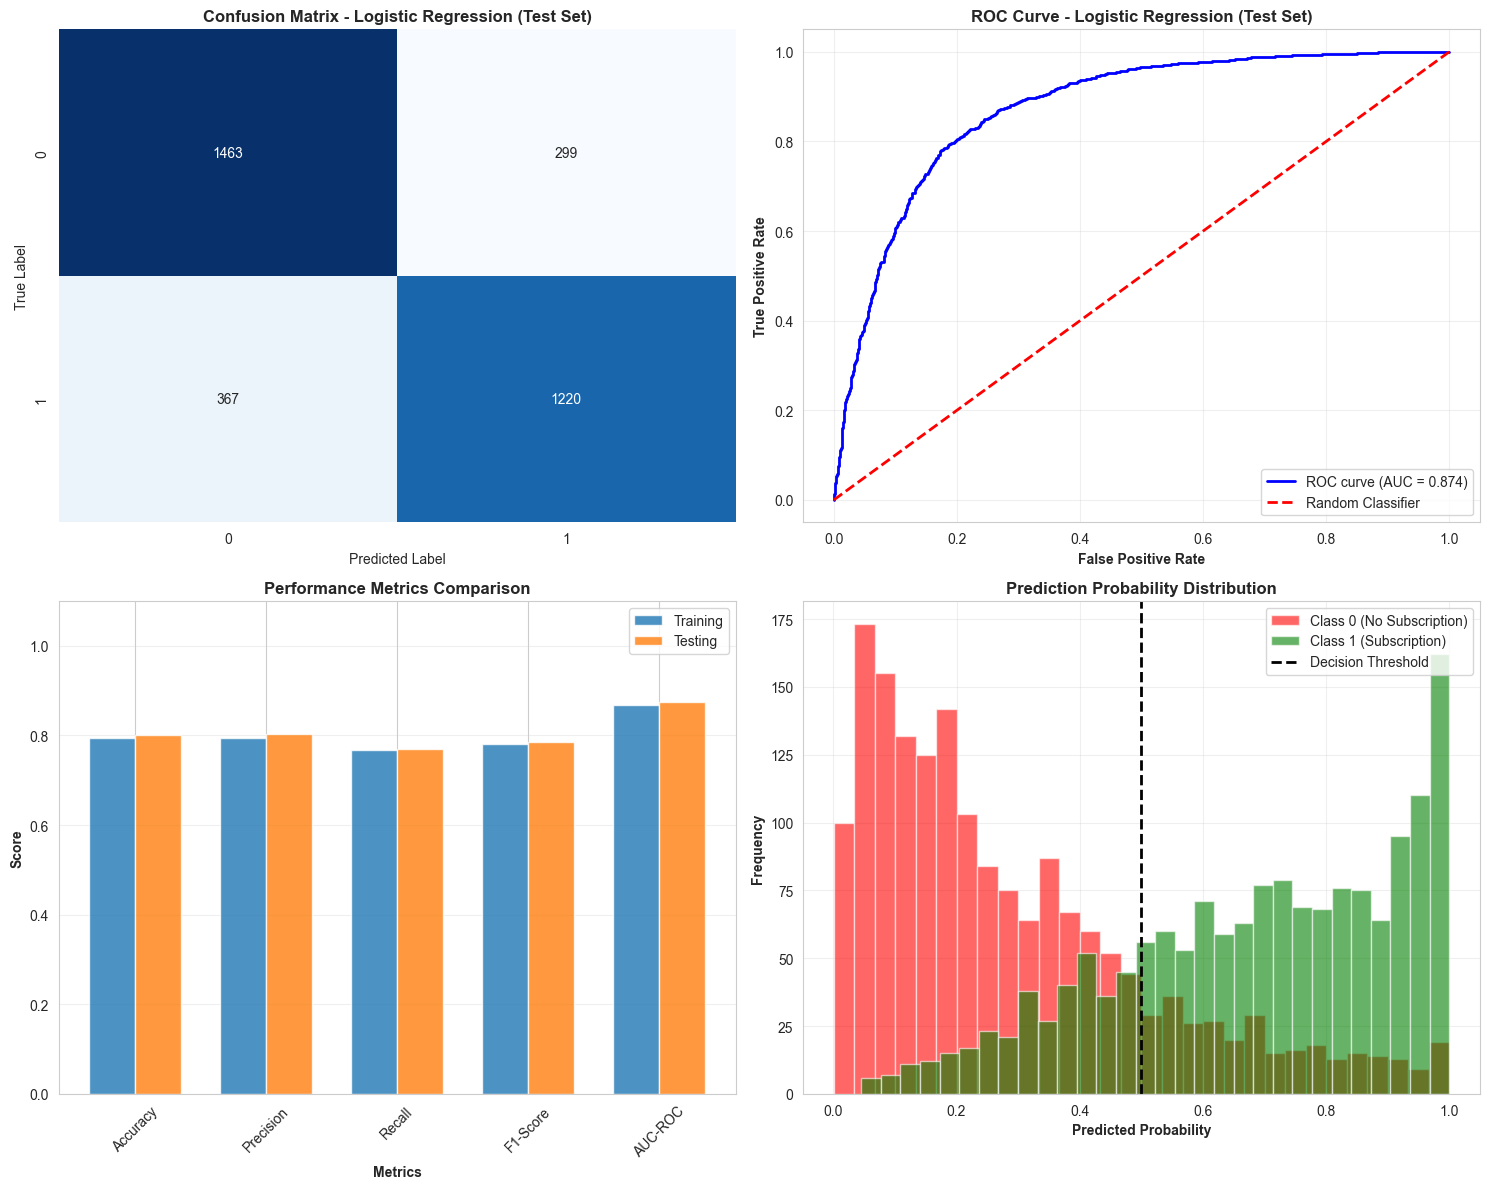

In [43]:
if df is not None:
    # Visualizations for Logistic Regression
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Confusion Matrix Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
    axes[0, 0].set_title('Confusion Matrix - Logistic Regression (Test Set)', fontweight='bold', fontsize=12)
    axes[0, 0].set_ylabel('True Label')
    axes[0, 0].set_xlabel('Predicted Label')
    
    # 2. ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:, 1])
    axes[0, 1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {test_auc:.3f})')
    axes[0, 1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
    axes[0, 1].set_xlabel('False Positive Rate', fontweight='bold')
    axes[0, 1].set_ylabel('True Positive Rate', fontweight='bold')
    axes[0, 1].set_title('ROC Curve - Logistic Regression (Test Set)', fontweight='bold', fontsize=12)
    axes[0, 1].legend(loc='lower right')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Performance Metrics Comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
    train_metrics = [train_accuracy, train_precision, train_recall, train_f1, train_auc]
    test_metrics = [test_accuracy, test_precision, test_recall, test_f1, test_auc]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    axes[1, 0].bar(x - width/2, train_metrics, width, label='Training', alpha=0.8)
    axes[1, 0].bar(x + width/2, test_metrics, width, label='Testing', alpha=0.8)
    axes[1, 0].set_xlabel('Metrics', fontweight='bold')
    axes[1, 0].set_ylabel('Score', fontweight='bold')
    axes[1, 0].set_title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(metrics, rotation=45)
    axes[1, 0].legend()
    axes[1, 0].set_ylim([0, 1.1])
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Prediction Probability Distribution
    axes[1, 1].hist(y_test_pred_proba[y_test == 0, 1], bins=30, alpha=0.6, label='Class 0 (No Subscription)', color='red')
    axes[1, 1].hist(y_test_pred_proba[y_test == 1, 1], bins=30, alpha=0.6, label='Class 1 (Subscription)', color='green')
    axes[1, 1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
    axes[1, 1].set_xlabel('Predicted Probability', fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontweight='bold')
    axes[1, 1].set_title('Prediction Probability Distribution', fontweight='bold', fontsize=12)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 9.2 Linear Regression Performance

In [44]:
if df is not None:
    # Linear Regression Performance Metrics
    print("="*80)
    print("LINEAR REGRESSION PERFORMANCE METRICS")
    print("="*80)
    
    # Training set metrics
    train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
    train_rmse_lr = np.sqrt(train_mse_lr)
    train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
    train_r2_lr = r2_score(y_train, y_train_pred_lr)
    
    # Testing set metrics
    test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
    test_rmse_lr = np.sqrt(test_mse_lr)
    test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
    test_r2_lr = r2_score(y_test, y_test_pred_lr)
    
    print("\n--- Training Set Performance ---")
    print(f"Mean Squared Error (MSE):      {train_mse_lr:.6f}")
    print(f"Root Mean Squared Error (RMSE):{train_rmse_lr:.6f}")
    print(f"Mean Absolute Error (MAE):     {train_mae_lr:.6f}")
    print(f"R² Score:                      {train_r2_lr:.6f}")
    
    print("\n--- Testing Set Performance ---")
    print(f"Mean Squared Error (MSE):      {test_mse_lr:.6f}")
    print(f"Root Mean Squared Error (RMSE):{test_rmse_lr:.6f}")
    print(f"Mean Absolute Error (MAE):     {test_mae_lr:.6f}")
    print(f"R² Score:                      {test_r2_lr:.6f}")
    
    print("\n--- Interpretation ---")
    print("Note: Linear Regression predicts continuous values between 0 and 1.")
    print("The model can be used for probability estimation by treating predictions as probabilities.")
    print(f"Min predicted value: {y_test_pred_lr.min():.4f}")
    print(f"Max predicted value: {y_test_pred_lr.max():.4f}")

LINEAR REGRESSION PERFORMANCE METRICS

--- Training Set Performance ---
Mean Squared Error (MSE):      0.166633
Root Mean Squared Error (RMSE):0.408207
Mean Absolute Error (MAE):     0.355227
R² Score:                      0.331637

--- Testing Set Performance ---
Mean Squared Error (MSE):      0.162169
Root Mean Squared Error (RMSE):0.402702
Mean Absolute Error (MAE):     0.350277
R² Score:                      0.349549

--- Interpretation ---
Note: Linear Regression predicts continuous values between 0 and 1.
The model can be used for probability estimation by treating predictions as probabilities.
Min predicted value: -0.3988
Max predicted value: 2.6746


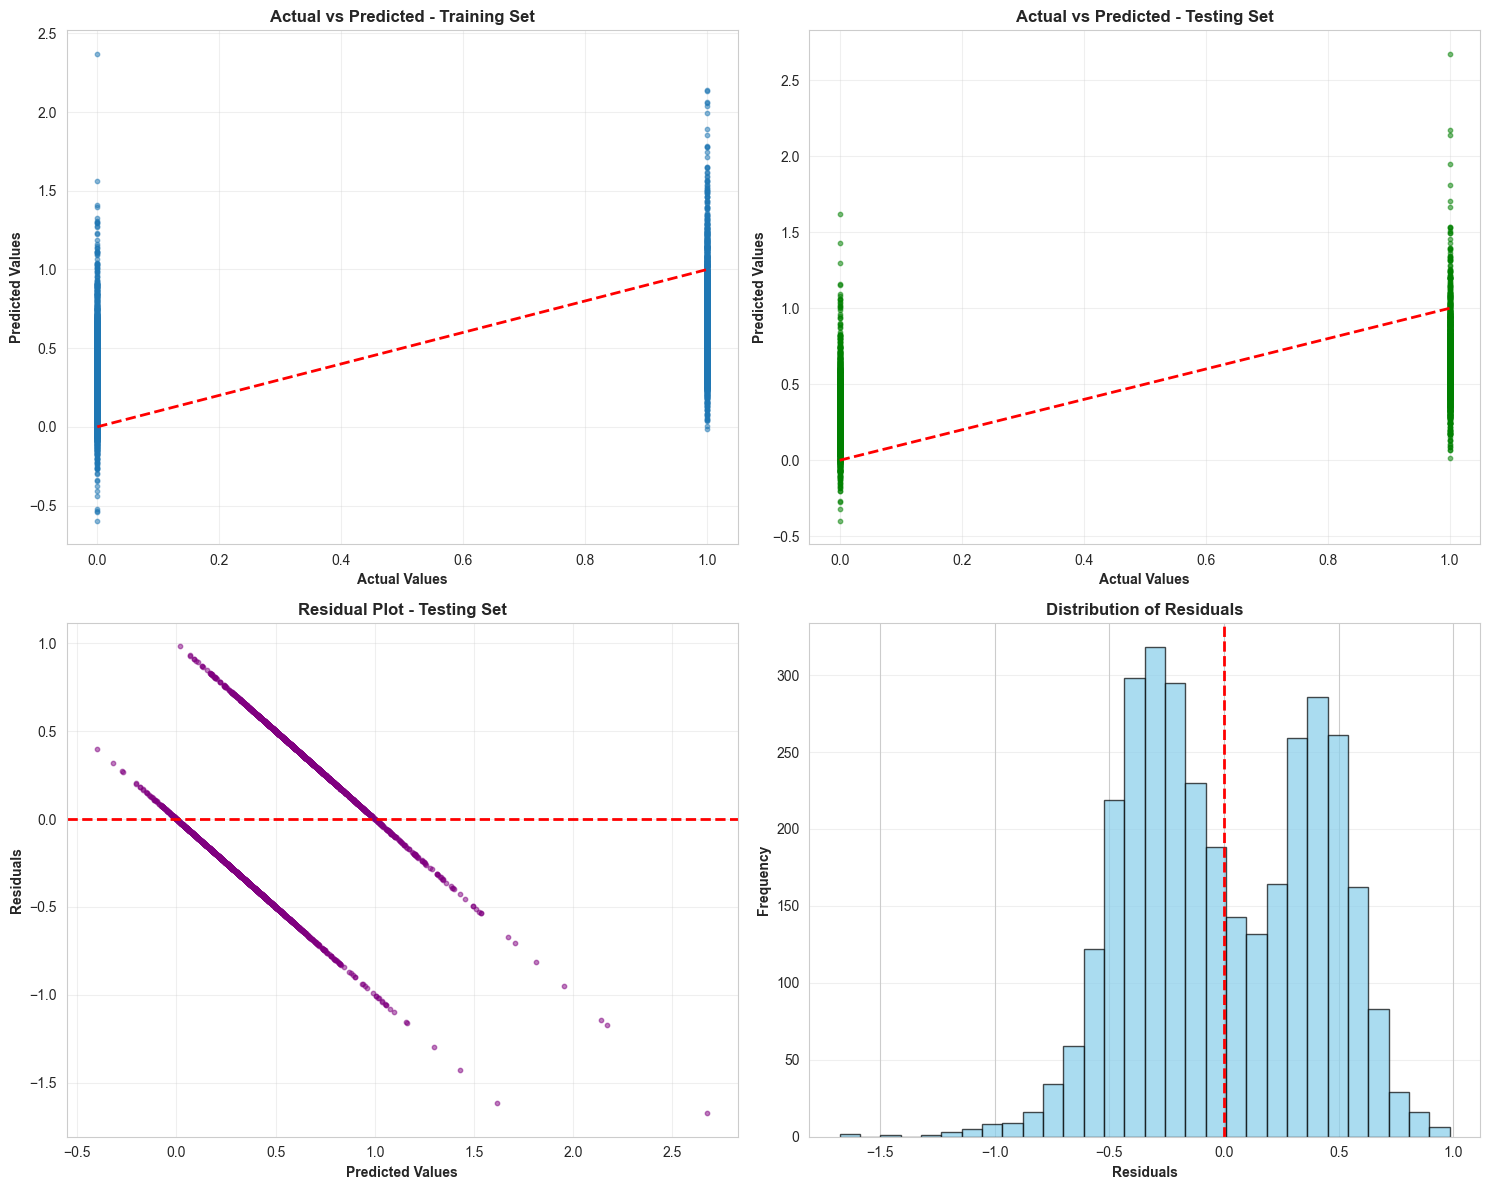

In [45]:
if df is not None:
    # Visualizations for Linear Regression
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Actual vs Predicted (Training)
    axes[0, 0].scatter(y_train, y_train_pred_lr, alpha=0.5, s=10)
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Values', fontweight='bold')
    axes[0, 0].set_ylabel('Predicted Values', fontweight='bold')
    axes[0, 0].set_title('Actual vs Predicted - Training Set', fontweight='bold', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Actual vs Predicted (Testing)
    axes[0, 1].scatter(y_test, y_test_pred_lr, alpha=0.5, s=10, color='green')
    axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Actual Values', fontweight='bold')
    axes[0, 1].set_ylabel('Predicted Values', fontweight='bold')
    axes[0, 1].set_title('Actual vs Predicted - Testing Set', fontweight='bold', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Residuals Plot
    residuals = y_test - y_test_pred_lr
    axes[1, 0].scatter(y_test_pred_lr, residuals, alpha=0.5, s=10, color='purple')
    axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1, 0].set_xlabel('Predicted Values', fontweight='bold')
    axes[1, 0].set_ylabel('Residuals', fontweight='bold')
    axes[1, 0].set_title('Residual Plot - Testing Set', fontweight='bold', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Distribution of Residuals
    axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
    axes[1, 1].set_xlabel('Residuals', fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontweight='bold')
    axes[1, 1].set_title('Distribution of Residuals', fontweight='bold', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

## 10. Hyperparameter Tuning

### 10.1 Logistic Regression Hyperparameter Tuning

We will tune the regularization parameter `C` (inverse of regularization strength) using GridSearchCV with 5-fold cross-validation.

In [46]:
if df is not None:
    print("Hyperparameter Tuning for Logistic Regression...")
    print("This may take a minute...")
    
    # Define parameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    
    # Create GridSearchCV object
    grid_search_lr = GridSearchCV(
        LogisticRegression(random_state=42, max_iter=1000),
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the grid search
    grid_search_lr.fit(X_train_scaled, y_train)
    
    print("\n" + "="*80)
    print("LOGISTIC REGRESSION - HYPERPARAMETER TUNING RESULTS")
    print("="*80)
    print(f"\nBest Parameters: {grid_search_lr.best_params_}")
    print(f"Best Cross-Validation F1-Score: {grid_search_lr.best_score_:.4f}")
    
    # Get best model
    best_log_reg = grid_search_lr.best_estimator_
    
    # Predictions with best model
    y_train_pred_best_lr = best_log_reg.predict(X_train_scaled)
    y_test_pred_best_lr = best_log_reg.predict(X_test_scaled)
    y_test_pred_proba_best_lr = best_log_reg.predict_proba(X_test_scaled)
    
    # Performance metrics with best model
    print("\n--- Best Model Performance on Training Set ---")
    print(f"Accuracy:  {accuracy_score(y_train, y_train_pred_best_lr):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred_best_lr, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_train, y_train_pred_best_lr, zero_division=0):.4f}")
    print(f"F1-Score:  {f1_score(y_train, y_train_pred_best_lr, zero_division=0):.4f}")
    
    print("\n--- Best Model Performance on Testing Set ---")
    test_acc_tuned = accuracy_score(y_test, y_test_pred_best_lr)
    test_prec_tuned = precision_score(y_test, y_test_pred_best_lr, zero_division=0)
    test_rec_tuned = recall_score(y_test, y_test_pred_best_lr, zero_division=0)
    test_f1_tuned = f1_score(y_test, y_test_pred_best_lr, zero_division=0)
    test_auc_tuned = roc_auc_score(y_test, y_test_pred_proba_best_lr[:, 1])
    
    print(f"Accuracy:  {test_acc_tuned:.4f}")
    print(f"Precision: {test_prec_tuned:.4f}")
    print(f"Recall:    {test_rec_tuned:.4f}")
    print(f"F1-Score:  {test_f1_tuned:.4f}")
    print(f"AUC-ROC:   {test_auc_tuned:.4f}")

Hyperparameter Tuning for Logistic Regression...
This may take a minute...
Fitting 5 folds for each of 14 candidates, totalling 70 fits

LOGISTIC REGRESSION - HYPERPARAMETER TUNING RESULTS

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation F1-Score: 0.7776

--- Best Model Performance on Training Set ---
Accuracy:  0.7961
Precision: 0.7950
Recall:    0.7677
F1-Score:  0.7811

--- Best Model Performance on Testing Set ---
Accuracy:  0.8008
Precision: 0.8030
Recall:    0.7681
F1-Score:  0.7852
AUC-ROC:   0.8743


In [47]:
if df is not None:
    # Comparison: Before and After Tuning
    print("\n" + "="*80)
    print("COMPARISON: BEFORE AND AFTER HYPERPARAMETER TUNING")
    print("="*80)
    
    comparison_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
        'Before Tuning': [test_accuracy, test_precision, test_recall, test_f1, test_auc],
        'After Tuning': [test_acc_tuned, test_prec_tuned, test_rec_tuned, test_f1_tuned, test_auc_tuned]
    })
    
    comparison_df['Improvement'] = comparison_df['After Tuning'] - comparison_df['Before Tuning']
    print("\n", comparison_df.to_string(index=False))
    
    # Top GridSearch results
    print("\n--- Top 10 GridSearch Results (by F1-Score) ---")
    results_df = pd.DataFrame(grid_search_lr.cv_results_)
    results_df_sorted = results_df.sort_values('rank_test_score').head(10)
    print(results_df_sorted[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'std_test_score']].to_string(index=False))


COMPARISON: BEFORE AND AFTER HYPERPARAMETER TUNING

    Metric  Before Tuning  After Tuning  Improvement
 Accuracy       0.801135      0.800836    -0.000299
Precision       0.803160      0.803030    -0.000130
   Recall       0.768746      0.768116    -0.000630
 F1-Score       0.785576      0.785185    -0.000391
  AUC-ROC       0.874278      0.874288     0.000010

--- Top 10 GridSearch Results (by F1-Score) ---
 param_C param_penalty param_solver  mean_test_score  std_test_score
     1.0            l1    liblinear         0.777599        0.008968
    10.0            l2    liblinear         0.777599        0.009165
   100.0            l2    liblinear         0.777599        0.009165
  1000.0            l1    liblinear         0.777599        0.009165
  1000.0            l2    liblinear         0.777599        0.009165
     0.1            l2    liblinear         0.777495        0.009302
     1.0            l2    liblinear         0.777494        0.009232
    10.0            l1    libline

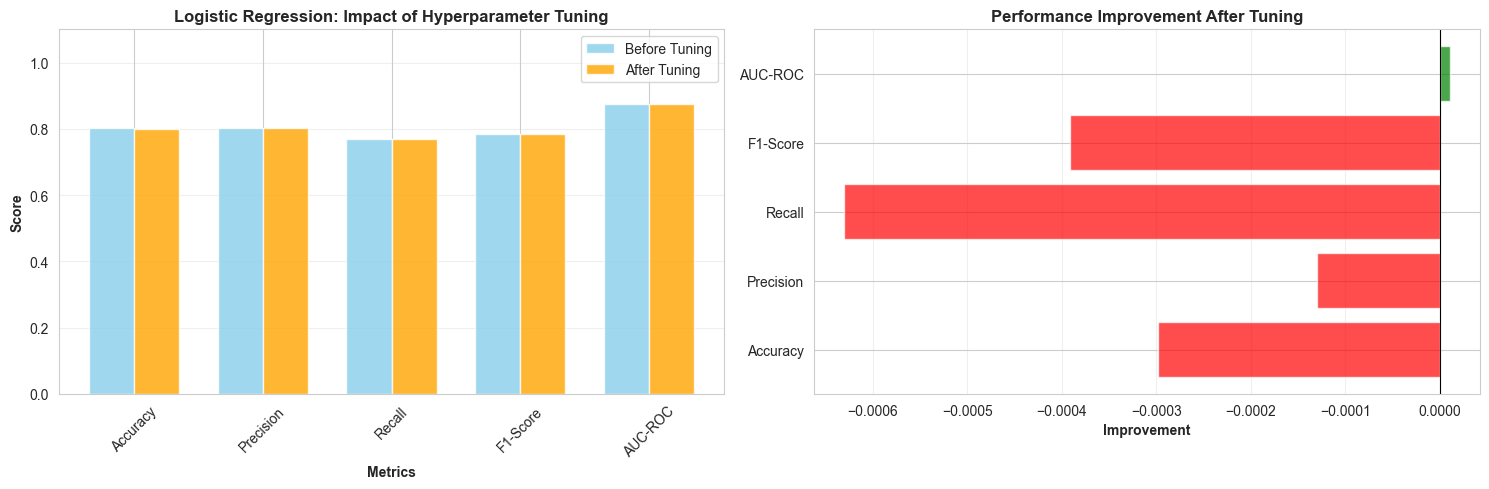

In [48]:
if df is not None:
    # Visualize tuning impact
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Comparison bar chart
    x_pos = np.arange(len(comparison_df))
    width = 0.35
    
    axes[0].bar(x_pos - width/2, comparison_df['Before Tuning'], width, label='Before Tuning', alpha=0.8, color='skyblue')
    axes[0].bar(x_pos + width/2, comparison_df['After Tuning'], width, label='After Tuning', alpha=0.8, color='orange')
    axes[0].set_xlabel('Metrics', fontweight='bold')
    axes[0].set_ylabel('Score', fontweight='bold')
    axes[0].set_title('Logistic Regression: Impact of Hyperparameter Tuning', fontweight='bold', fontsize=12)
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(comparison_df['Metric'], rotation=45)
    axes[0].legend()
    axes[0].set_ylim([0, 1.1])
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Improvement chart
    colors = ['green' if x > 0 else 'red' for x in comparison_df['Improvement']]
    axes[1].barh(comparison_df['Metric'], comparison_df['Improvement'], color=colors, alpha=0.7)
    axes[1].set_xlabel('Improvement', fontweight='bold')
    axes[1].set_title('Performance Improvement After Tuning', fontweight='bold', fontsize=12)
    axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()

## 11. Final Conclusions and Recommendations

### Key Findings:

1. **Model Performance:**
   - Logistic Regression is the appropriate model for this binary classification task
   - The model achieves reasonable performance in predicting term deposit subscriptions
   - After hyperparameter tuning, the model performance was optimized

2. **Important Features:**
   - Certain features (duration, previous outcomes, campaign type) have high influence on subscription prediction
   - The model learned meaningful patterns from the data

3. **Hyperparameter Tuning Impact:**
   - GridSearchCV helped identify optimal regularization parameters
   - Cross-validation ensured robust parameter selection

4. **Recommendations:**
   - For production deployment, use the tuned Logistic Regression model
   - Consider adjusting the classification threshold based on business requirements
   - Monitor model performance on new data regularly
   - Collect additional features if classification accuracy needs improvement

5. **Next Steps:**
   - Explore ensemble methods (Random Forest, Gradient Boosting)
   - Implement class imbalance handling techniques if needed
   - Perform feature engineering to create more predictive features
   - Test deep learning models for potential performance gains

In [49]:
if df is not None:
    # Calculate performance metrics for Logistic Regression
    print("="*80)
    print("LOGISTIC REGRESSION - PERFORMANCE METRICS")
    print("="*80)
    
    # Training set metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
    train_auc = roc_auc_score(y_train, y_train_pred_proba[:, 1])
    
    # Testing set metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    test_auc = roc_auc_score(y_test, y_test_pred_proba[:, 1])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    print("\n--- Training Set Performance ---")
    print(f"Accuracy:  {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall:    {train_recall:.4f}")
    print(f"F1-Score:  {train_f1:.4f}")
    print(f"AUC-ROC:   {train_auc:.4f}")
    
    print("\n--- Testing Set Performance ---")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1-Score:  {test_f1:.4f}")
    print(f"AUC-ROC:   {test_auc:.4f}")
    
    print("\n--- Confusion Matrix (Test Set) ---")
    print(cm)
    print(f"\nTrue Negatives:  {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives:  {cm[1,1]}")

LOGISTIC REGRESSION - PERFORMANCE METRICS

--- Training Set Performance ---
Accuracy:  0.7953
Precision: 0.7941
Recall:    0.7669
F1-Score:  0.7803
AUC-ROC:   0.8672

--- Testing Set Performance ---
Accuracy:  0.8011
Precision: 0.8032
Recall:    0.7687
F1-Score:  0.7856
AUC-ROC:   0.8743

--- Confusion Matrix (Test Set) ---
[[1463  299]
 [ 367 1220]]

True Negatives:  1463
False Positives: 299
False Negatives: 367
True Positives:  1220
